In [43]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
seoul_=pd.read_csv('../data/seoul_.csv')
seoul_=seoul_[23:]

seoul_.columns
seoul_.drop([ '합계.1', '합계.2', '합계.3', '합계.4', '조직형태별',
       '조직형태별.1', '조직형태별.2', '조직형태별.3', '조직형태별.4', '조직형태별.5', '조직형태별.6',
       '조직형태별.7', '사업체구분별', '사업체구분별.1', '사업체구분별.2', '사업체구분별.3', '사업체구분별.4',
       '사업체구분별.5'],axis=1,inplace=True)

seoul_[seoul_['구분']=='합계']

seoul_[seoul_['구분']=='부동산업'].sort_values('합계',ascending=False)

,기간,자치구,구분,합계
182,2019,강북구,부동산업,811
202,2019,도봉구,부동산업,808
447,2019,강남구,부동산업,"6,027"
427,2019,서초구,부동산업,"3,508"
467,2019,송파구,부동산업,"2,725"
314,2019,강서구,부동산업,"2,154"
276,2019,마포구,부동산업,"2,073"
371,2019,영등포구,부동산업,"2,039"
54,2019,중구,부동산업,"1,780"
485,2019,강동구,부동산업,"1,779"


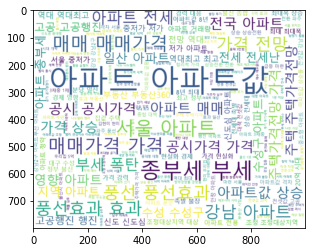

In [53]:
import requests
import importlib
from importlib import util
import re
from konlpy.tag import Kkma
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Kkma=Kkma() # 한글 명사 단어 추출
result=[]
for num in range(1,100): # 네이버 뉴스 "서울시 아파트 가격 영향" 검색어를 기준으로 크롤링 100페이지까지 데이터 추출
    url = f'https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%EC%95%84%ED%8C%8C%ED%8A%B8+%EA%B0%80%EA%B2%A9+%EC%98%81%ED%96%A5&oquery=%EC%84%9C%EC%9A%B8%EC%8B%9C+%EC%95%84%ED%8C%8C%ED%8A%B8+%EA%B0%80%EA%B2%A9+%EC%98%81%ED%96%A5&tqi=h6ONzwp0JXossTO9NqhssssstX0-012366&nso=so%3Ar%2Cp%3Afrom20200101to20201130&de=2020.11.30&ds=2020.01.01&mynews=0&office_section_code=0&office_type=0&pd=3&photo=0&sort=0,a:all&start={num+10}'

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    news_titles = soup.select('.news_tit')
    
    for title in news_titles:
        title['title']=Kkma.nouns(title['title'])# 한글 명사 단어 추출
        title['title']=[ token for token in title['title'] if len(token) > 1 ]
        result.append(title['title'])
        
result = sum(result, [])
result =' '.join(result)

wordcloud = WordCloud(font_path="C:\Windows\Fonts\malgun.ttf",background_color='white', width=1000, height=800).generate(result)


plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

